In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [19]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
Measurements = Base.classes.measurement

Stations = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-24").\
    filter(Measurements.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data).set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date').dropna()

# Rename the prcp column
precipitation_df = precipitation_df.rename(columns={'prcp':'precipitation'})

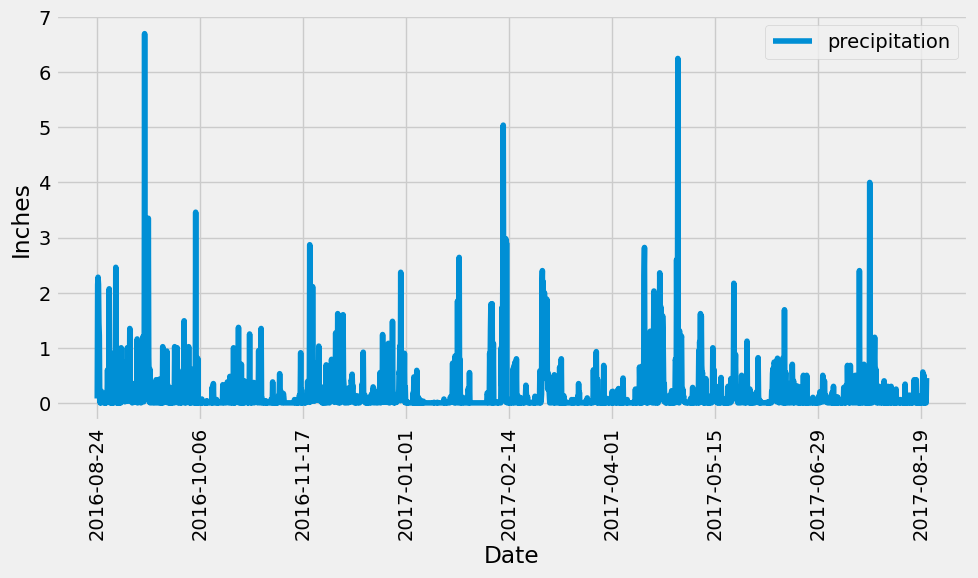

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(y='precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
stations_data = session.query(Stations.station).count()
stations_data

9

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0].station

temperature_calculations = session.query(func.min(Measurements.tobs).label('min_temp'),
                                        func.max(Measurements.tobs).label('max_temp'),
                                        func.avg(Measurements.tobs).label('avg_temp'))\
.filter(Measurements.station == most_active_station)\
.all()
temperature_calculations

[(54.0, 85.0, 71.66378066378067)]

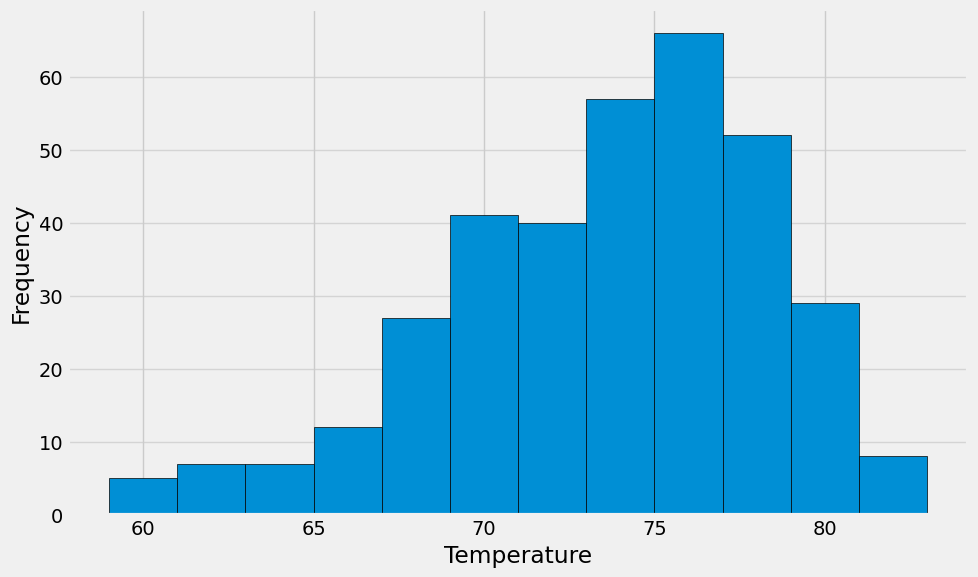

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_12months = session.query(Measurements.date, Measurements.tobs)\
    .filter(Measurements.station == most_active_station)\
    .filter(Measurements.date >= "2016-08-24")\
    .all()

# Save the query results into Pandas
USC00519281_12months_df = pd.DataFrame(USC00519281_12months, columns=['Date','Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(USC00519281_12months_df['Temperature'], bins=12, label='tobs', edgecolor= 'black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis= 'y', alpha= 0.75)
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()